In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

## Preprocessing The data
- Training Set  & Test Set
  - remove 1st and second row as well as selected column  
  - divide into train_input and train_label
  - normalize the data

### Normalizing the data

# Training

In [116]:
import torch.optim as optim
import time
from torch.nn import functional as F

In [117]:
class power(nn.Module):
  def __init__(self):
    super(power,self).__init__()
    self.fc1 = nn.Linear(6,6)
    self.fc2 = nn.Linear(6,6)
    self.fc3 = nn.Linear(6,1)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x
power = power()
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
print(device)
power.to(device)
class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))
RMSLELoss = RMSLELoss()
RMSLELoss.to(device)
optimizer = optim.Adam(power.parameters())
criterion = nn.MSELoss()

cuda:0


epoch : 0--- loss = 178920560.000000
epoch : 1000--- loss = 163673808.000000
epoch : 2000--- loss = 94292808.000000
epoch : 3000--- loss = 21599270.000000
epoch : 4000--- loss = 1247959.375000
epoch : 5000--- loss = 602324.250000
epoch : 6000--- loss = 590800.875000
epoch : 7000--- loss = 573848.125000
epoch : 8000--- loss = 548449.250000
epoch : 9000--- loss = 512327.218750
epoch : 10000--- loss = 464359.843750
epoch : 11000--- loss = 406068.875000
epoch : 12000--- loss = 343153.500000
epoch : 13000--- loss = 283741.531250
epoch : 14000--- loss = 233637.078125
epoch : 15000--- loss = 194267.359375
epoch : 16000--- loss = 163879.171875
epoch : 17000--- loss = 139857.171875
epoch : 18000--- loss = 121487.054688
epoch : 19000--- loss = 109163.335938
epoch : 20000--- loss = 101977.281250
epoch : 21000--- loss = 98329.554688
epoch : 22000--- loss = 96428.164062
epoch : 23000--- loss = 95574.968750
epoch : 24000--- loss = 95339.257812
epoch : 25000--- loss = 95312.796875
epoch : 26000--- lo

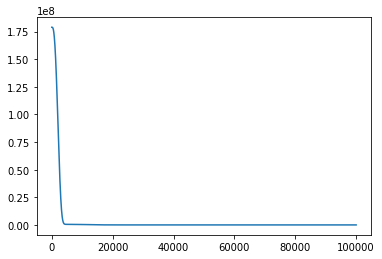

In [118]:
t_start = time.time()
losses = []
for i in range(100000):
  optimizer.zero_grad()
  pred_label = power(train_input.float().to(device)).squeeze()
  loss = criterion(pred_label.float().to(device),train_label.float().to(device))
  loss.backward()
  optimizer.step()
  losses.append(loss)
  if(i%1000==0):
    print("epoch : %d--- loss = %5f"%(i,loss))
print("total time taken is : %5f s"%(time.time()-t_start))
plt.plot(losses)
plt.show()

In [148]:
train_set = pd.read_csv('/content/Training Data_KHANAN.csv')
test_set = pd.read_csv('/content/Test_Data_KHANAN.csv')
train_set = train_set.drop(labels = [0,1])
train_label = train_set['HP']
train_input = train_set.drop(columns=['HP','Selected'])
test_set = test_set.drop(labels = [0,1])
test_label = test_set['HP']
test_input = test_set.drop(columns=['HP','Selected'])
train_input = train_input.astype('float64')
train_label = train_label.astype('float64')
test_input = test_input.astype('float64')
test_label = test_label.astype('float64')
train_input = train_input.values
train_label = train_label.values
test_input = test_input.values
test_label = test_label.values
train_input = torch.from_numpy(train_input)
train_label = torch.from_numpy(train_label)
test_input= torch.from_numpy(test_input)
test_label = torch.from_numpy(test_label)
print(train_input.shape,train_label.shape,test_input.shape,test_label.shape)

torch.Size([1600, 6]) torch.Size([1600]) torch.Size([400, 6]) torch.Size([400])


In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_input)
train_input = scaler.transform(train_input)
train_input = torch.from_numpy(train_input)
test_input = scaler.fit_transform(test_input)
test_input = torch.from_numpy(test_input)
print(train_input.shape,train_label.shape)
print(test_input.shape,test_label.shape)

torch.Size([1600, 6]) torch.Size([1600])
torch.Size([400, 6]) torch.Size([400])


## Train set accuracy

MSE loss is :95312.117188


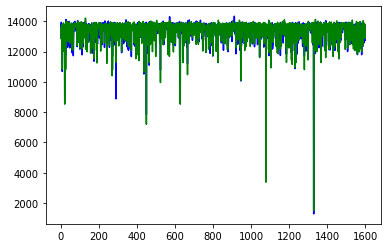

In [150]:
x = np.linspace(1,1600,1600)
pred_train_label = power(train_input.float().to(device)).squeeze()
loss = criterion(pred_train_label.float().to(device),train_label.float().to(device))
print("MSE loss is :%5f"%(loss))
pred_train_label = pred_train_label.data.cpu().numpy()
train_label = train_label.data.cpu().numpy()
plt.plot(x,pred_train_label,color='b')
plt.plot(x,train_label,color='g')
# plt.plot(train_label,c = 'b',label = 'actual_power')
plt.show()

# Test Set Accuracy

MSE loss is : 111959.828125


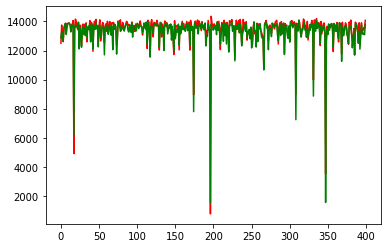

In [151]:
pred_test_label = power(test_input.float().to(device)).squeeze()
loss = criterion(pred_test_label.float().to(device),test_label.float().to(device))
print("MSE loss is : %5f"%(loss))
pred_test_label = pred_test_label.data.cpu().numpy()
test_label = test_label.data.cpu().numpy()
plt.plot(pred_test_label,c = 'r',label = 'test_prediction')
plt.plot(test_label,c = 'g',label = 'actual_power')
plt.show()

In [154]:
np.savetxt('result_test_data.csv',pred_test_label)

In [155]:
np.savetxt('result_train_data.csv',pred_train_label)